# Homework 3 Questions

Please answer each of the questions below in the space provided. Copy the noteook, and when you're done, submit as an ipynb file. This will be graded on correctness. Please comment your code to help the grader figure out what you're doing. If you do a hypothesis test, please report all relevant p-values in the text field.

Imports and data loading:

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
import pandas as pd
df1 = pd.read_csv("Dataset Generation (2024) (Responses) - Form Responses 1.csv")
df2 = pd.read_csv("Dataset Generation (Fardina) (Responses) - Form Responses 1.csv")
#df3 = pd.read_csv("Dataset Generation (Max) (Responses) - Form Responses 1.csv")

Data cleaning:

In [142]:
# check for duplicates
#print(len(df1))
#print(len(df1.drop_duplicates()))

print(len(df2))
print(len(df2.drop_duplicates()))

#print(len(df3))
#print(len(df3.drop_duplicates()))

144
144


In [143]:
print(len(df2))
# gets rid of people who we can't identify what their background is, because without any background, any analysis is not as important compared to those with
df2.dropna(subset=['What year are you?', 'How old are you?', 'You could describe the adults you grew up with as...', 'You could describe yourself as...', 'How would you rate your religiousness / spirituality?', 'What bests represents your gender?'], how='all', inplace = True)
print(len(df2))

144
139


In [144]:

def find_and_fill(row, parent_df):
  if pd.isna(row['How old are you?']):
    year = row['What year are you?']
    med_val = parent_df.loc[parent_df['What year are you?'] == year]['How old are you?'].median()
    #print(row['How old are you?'])
    row['How old are you?'] = med_val
    #print(med_val)
    print(row['How old are you?'])

  return row

def fix_female(value):
  #print(value)
  if value == 'Famale':
    value = 'Female'
  #print(value)
  return value

# finds any missing years, fills in with median of what year they are in
#print(df2['How old are you?'].head())
df2 = df2.apply(find_and_fill, args=(df2,), axis = 1)
#print(df2['How old are you?'].head())
print(len(df2))

# fix famale to female
#df2['What bests represents your gender?']
df2['What bests represents your gender?'] = df2['What bests represents your gender?'].apply(fix_female)
#df2['What bests represents your gender?']

# changes ['Timestamp'] to datetime objects
#df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])


#df2['What bests represents your gender?']


139


In [145]:
import statistics as stat
'''
# fill in any blank answers with mode value
#def fill_in(col):
  #print(col)
  #mode_val = stat.mode(col)
  #print(mode_val)
  #print(col.name)
  #df2[col.name] = df2[col.name].fillna(mode_val)
  #print(df2[col.name])
  #return col

#df2['What bests represents your gender?']=df2['What bests represents your gender?'].fillna('alien')
#df2
#df2.iloc[:, 8:] = df2.iloc[:, 8:].apply(fill_in)
#df2.iloc[:, 8:].head()
#df2
'''
for column in df2.iloc[:, 8:]:
    col = df2[column]
    mode_val = stat.mode(col)
    df2[column] = df2[column].fillna(value = mode_val)

#df2.iloc[:, 8:].head()


1. Create a graph telling a story about students political beliefs vs. their parents.

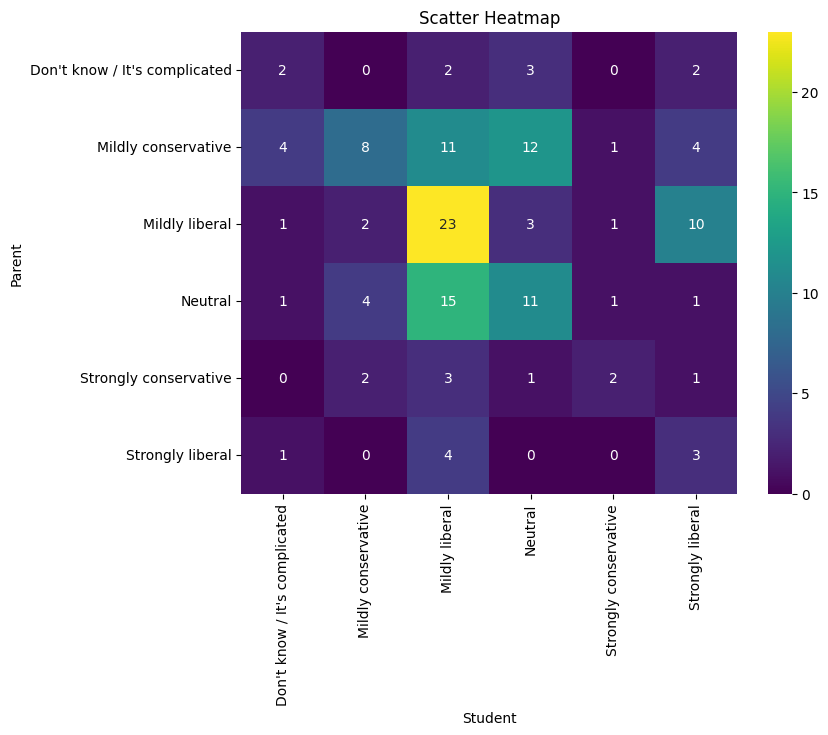

In [146]:

import matplotlib.pyplot as plt
import seaborn as sns

df_poli = df2.iloc[:, 3:5]
df_poli.columns = ['SP', 'PP']

heatmap_data = df_poli.groupby(['SP', 'PP']).size().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Student')
plt.ylabel('Parent')
plt.title('Scatter Heatmap')
plt.show()


2. Show the percent of each answer for the political beliefs over all the respondants (so the percent of liberals, conservatives, etc).

In [147]:

df_stud_belief = df2[['You could describe yourself as...']]
#df_stud_belief.to_frame()
df_stud_belief.columns = ['Political Belief']
#df_stud_belief = df_stud_belief.rename(columns = {'You could describe yourself as...':'Student Political Belief'})
df_stud_belief.head()

df_par_belief = df2[['You could describe the adults you grew up with as...']]
df_par_belief.columns = ['Political Belief']
df_par_belief.head()

poli_beliefs = pd.concat([df_stud_belief,df_par_belief])
#poli_beliefs.info()

#poli = poli_beliefs.groupby('Political Belief')['Political Belief'].count()
#poli
#pd.merge(poli_beliefs, poli_beliefs.groupby('Political Belief')['Political Belief'].count())
#poli_beliefs['sum'] = poli
#poli_beliefs
#poli_beliefs['sum'] = poli_beliefs.groupby('Political Belief')['Political Belief'].count()
#poli_beliefs

df_agg = poli_beliefs.groupby('Political Belief').agg(cnt=('Political Belief', 'count'))
df_agg['percent'] = (df_agg['cnt'] / df_agg['cnt'].sum()) * 100
df_agg


,cnt,percent
Political Belief,,
Don't know / It's complicated,18,6.474820
Mildly conservative,56,20.143885
Mildly liberal,98,35.251799
Neutral,63,22.661871
Strongly conservative,14,5.035971
Strongly liberal,29,10.431655


3. Does the priming question have a statistically significant effect on any questions? If so, which ones?

Your answer here:

In [151]:
# Code for answer
from scipy.stats import chi2_contingency

alpha = .05
primer = df2['Would you describe yourself as compassionate?']
results = {}

for col in df2.iloc[:, 8:]:
  contingency_table = pd.crosstab(primer, df2[col])
  #print(contingency_table)

  chi2, p, dof, ex = chi2_contingency(contingency_table)

  results[col] = p
  #results['Stat Sig'] = (p <= alpha)

#results

for col in results:
  value = results[col]

  if value <= alpha:
    print(value)
    print(f'Statistically Significant with alpha value = {alpha}')
    print(f'{col}\n')
  else:
    print(value)
    print(f'Not Statistically Significant with alpha value = {alpha}\n')

0.40806830976942554
Not Statistically Significant with alpha value = 0.05

0.8991031556063247
Not Statistically Significant with alpha value = 0.05

0.8127404909112211
Not Statistically Significant with alpha value = 0.05

0.08559356478611228
Not Statistically Significant with alpha value = 0.05

0.12262975386304577
Not Statistically Significant with alpha value = 0.05

0.05270744075129387
Not Statistically Significant with alpha value = 0.05

0.4762961128912854
Not Statistically Significant with alpha value = 0.05

0.03828877597450171
Statistically Significant with alpha value = 0.05
I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on th

4. Does swapping genders have a stastically significant effect on any questions? If so, which ones?

Your answer here:

In [152]:
# Code for answer
from scipy.stats import chi2_contingency

alpha = .05
gender = df2['What bests represents your gender?']
results = {}

def swap_gender(value):
  #gender_row = row['What bests represents your gender?']
  #print(value)
  if value == 'Male':
    value = 'Female'
  elif value == 'Famale' or value == 'Female':
    value = 'Male'
  return value



#swap genders
df2['Swapped Genders'] = df2['What bests represents your gender?'].apply(swap_gender)



for col in df2.iloc[:, 8:22]:
  contingency_table = pd.crosstab(gender, df2[col])

  chi2, p, dof, ex = chi2_contingency(contingency_table)

  results[col] = p


for col in results:
  value = results[col]

  if value <= alpha:
    print(value)
    print('Statistically Significant with alpha value = .05')
    print(f'{col}\n')
  else:
    print(value)
    print('Not Statistically Significant with alpha value = .05\n')

#df2['What bests represents your gender?']

0.0038088163859572133
Statistically Significant with alpha value = .05
My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?

0.15973938082062228
Not Statistically Significant with alpha value = .05

0.1613923333593258
Not Statistically Significant with alpha value = .05

0.24622743579206338
Not Statistically Significant with alpha value = .05

0.6698333572413102
Not Statistically Significant with alpha value = .05

0.026487931763816246
Statistically Significant with alpha value = .05
My sister's nine year old daughter is poorly behaved. One day, my sister dropped the daughter off on my doorstep without my consent a

5. What hour of the day were most of the surveys completed?

Your answer here:

In [153]:
df2['Timestamp']
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])
df2['Timestamp_hours'] = df2['Timestamp'].dt.hour
#df2['Timestamp_hours']

df2.groupby('Timestamp_hours')['Timestamp_hours'].count().sort_values(ascending=False)

# looking at the data table:
# hour 21 (9pm) had the most surveys completed at 41 surveys

,Timestamp_hours
Timestamp_hours,
21,41
22,13
18,13
23,7
20,6
19,6
11,6
12,6
14,5


6. Which two questions in this semester's data have the most correlated answer?

Your answer:

In [154]:
df2['1_as_num'] = df2.iloc[:, 8].astype('category').cat.codes
df2['2_as_num'] = df2.iloc[:, 9].astype('category').cat.codes
df2['3_as_num'] = df2.iloc[:, 10].astype('category').cat.codes
df2['4_as_num'] = df2.iloc[:, 11].astype('category').cat.codes
df2['5_as_num'] = df2.iloc[:, 12].astype('category').cat.codes
df2['6_as_num'] = df2.iloc[:, 13].astype('category').cat.codes
df2['7_as_num'] = df2.iloc[:, 14].astype('category').cat.codes
df2['8_as_num'] = df2.iloc[:, 15].astype('category').cat.codes
df2['9_as_num'] = df2.iloc[:, 16].astype('category').cat.codes
df2['10_as_num'] = df2.iloc[:, 17].astype('category').cat.codes
df2['11_as_num'] = df2.iloc[:, 18].astype('category').cat.codes
df2['12_as_num'] = df2.iloc[:, 19].astype('category').cat.codes
df2['13_as_num'] = df2.iloc[:, 20].astype('category').cat.codes
df2['14_as_num'] = df2.iloc[:, 21].astype('category').cat.codes


df_corr = df2.iloc[:, 24:].corr()

pd.melt(df_corr)
df_corr['col'] = df_corr.columns
df_corr
melted = pd.melt(df_corr, id_vars=['col'])

# gets rid of rows where correlation = 1
melted = melted[melted['value'] != 1]
melted
melted.sort_values('value', ascending = False)

# looking at the table:
# "my sister is going to be a bridesmaid" and "my wife has decided she can't drink"
# is the most correlated with value: 0.303672
#
# the second highest correlation is:
# "some of my relatives refuse to come to my wedding" and "my daughter is getting married soon"
# with value: 0.254665
#df2.iloc[:, 24:]

,col,variable,value
194,13_as_num,14_as_num,0.303672
181,14_as_num,13_as_num,0.303672
25,12_as_num,2_as_num,0.254665
155,2_as_num,12_as_num,0.254665
140,1_as_num,11_as_num,0.237298
...,...,...,...
2,3_as_num,1_as_num,-0.090376
124,13_as_num,9_as_num,-0.108212
176,9_as_num,13_as_num,-0.108212
151,12_as_num,11_as_num,-0.145436


7. Which two questions this semseter had the highest covariance?

Your answer:

In [155]:

df_cov = df2.iloc[:, 24:].cov()

pd.melt(df_cov)
df_cov['col'] = df_cov.columns
df_cov
melted = pd.melt(df_cov, id_vars=['col'])

# gets rid of values where questions are the same
melted = melted[melted['col'] != melted['variable']]
melted
melted.sort_values('value', ascending = False)

# looking at the table:
# "my sister is going to be a bridesmaid" and "my wife has decided she can't drink"
# has the highest covariance with: 0.246950
#
# the second highest covariance is:
# "my sister is going to be a bridesmaid" and "my parents want us to come to their wedding anniversary"
# with value: 0.141747

,col,variable,value
194,13_as_num,14_as_num,0.246950
181,14_as_num,13_as_num,0.246950
188,7_as_num,14_as_num,0.141747
97,14_as_num,7_as_num,0.141747
193,12_as_num,14_as_num,0.128767
...,...,...,...
2,3_as_num,1_as_num,-0.038161
164,11_as_num,12_as_num,-0.049473
151,12_as_num,11_as_num,-0.049473
176,9_as_num,13_as_num,-0.066625


8. Which question this semseter was most strongly influenced by respondants religious views?

Your answer:

In [156]:

from scipy.stats import chi2_contingency
import numpy as np

religion = df2['How would you rate your religiousness / spirituality?']

# calculate cramer v
def cramers_v(contingency_table):
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()  # Total sample size
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1))), p


max_cramers_v = 0
max_pair = ''
p_value_min = 1


for col in df2.iloc[:, 8:22]:
    contingency_table = pd.crosstab(religion, df2[col])

    # calc cramer v and p-value for the chi square test
    cramers_value, p_value = cramers_v(contingency_table)

    if cramers_value > max_cramers_v:
        max_cramers_v = cramers_value
        max_pair = col
        p_value_min = p_value


print(f"The question most influenced by religious views is: \n{max_pair}")
print(f"Cramer V: {max_cramers_v}")
print(f"P-value: {p_value}")


The question most influenced by religious views is: 
My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight.

She calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn't comfortable with that, but she says "nephew loves you so much" so we can work something out on the flight and hangs up.

When I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?
Cramer V: 0.20444286292015243
P-value: 0.07258273480131094


9. Are there any questions where graduate students had a stastically signifant difference from undergraduate students? If so, which ones?

Your answer:

In [157]:
# use clean 2024 responses data tables because dataset-Fardina and dataset-Max doesn't have grad students
import statistics as stat

# check for duplicates
print(len(df1))
print(len(df1.drop_duplicates()))

# gets rid of people who we can't identify what their background is, because without any background, any analysis is not as important compared to those with
print(len(df1))
df1.dropna(subset=['What year are you?', 'How old are you?', 'You could describe the adults you grew up with as...', 'You could describe yourself as...', 'How would you rate your religiousness?', 'What bests represents your gender?'], how='all', inplace = True)
print(len(df1))


def find_and_fill(row, parent_df):
  if pd.isna(row['How old are you?']):
    year = row['What year are you?']
    med_val = parent_df.loc[parent_df['What year are you?'] == year]['How old are you?'].median()
    #print(row['How old are you?'])
    row['How old are you?'] = med_val
    #print(med_val)
    #print(row['How old are you?'])

  return row


def fix_female(value):
  #print(value)
  if value == 'Famale':
    value = 'Female'
  #print(value)
  return value

df1 = df1.apply(find_and_fill, args=(df1,), axis = 1)
print(len(df1))

# fix famale to female
df1['What bests represents your gender?'] = df1['What bests represents your gender?'].apply(fix_female)

# fill in blank value with mode value
for column in df1.iloc[:, 8:]:
    col = df1[column]
    mode_val = stat.mode(col)
    df1[column] = df1[column].fillna(value = mode_val)

133
133
133
133
133


In [158]:
def under_grad(value):
  if value == 'Freshman' or value == 'Sophmore' or value == 'Junior' or value == 'Senior':
    value = 'Undergraduate'
  else:
    value = 'Graduate'
  return value

df1['Under/Grad'] = df1['What year are you?'].apply(under_grad)
df1['Under/Grad']

# chi square test
alpha = .05
under_or_grad = df1['Under/Grad']
results = {}

for col in df1.iloc[:, 7:21]:
  contingency_table = pd.crosstab(under_or_grad, df1[col])
  #print(contingency_table)

  chi2, p, dof, ex = chi2_contingency(contingency_table)

  results[col] = p
  #results['Stat Sig'] = (p <= alpha)

#results

for col in results:
  value = results[col]

  if value <= alpha:
    print(value)
    print(f'Statistically Significant difference with alpha value = {alpha}')
    print(f'{col}\n')
  else:
    print(value)
    print(f'No Statistically Significant difference with alpha value = {alpha}\n')


0.23391051013458017
No Statistically Significant difference with alpha value = 0.05

0.518572799729873
No Statistically Significant difference with alpha value = 0.05

0.13912830384445768
No Statistically Significant difference with alpha value = 0.05

0.7999849509104489
No Statistically Significant difference with alpha value = 0.05

0.33482619809733544
No Statistically Significant difference with alpha value = 0.05

0.782907527254967
No Statistically Significant difference with alpha value = 0.05

0.523015657668056
No Statistically Significant difference with alpha value = 0.05

0.01754438426308657
Statistically Significant difference with alpha value = 0.05
I'm a single dad with four kids, one of whom has a different mother from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and tol

10. Bin the responses by morning, afternoon, evening and night. Do these catagories have a statistically significant effect on any questions? If so, which ones?

Your answer:

In [159]:
# back to using dataset-Fardina
df2['Timestamp_hours']

bins = [0,9,14,19,23]
labels = ['Morning', 'Afternoon', 'Evening', 'Night']

df2['Bin'] = pd.cut(df2['Timestamp_hours'], bins=bins, labels=labels)
#df2['Bin']

# chi square test
alpha = .05
bin = df2['Bin']
results = {}

for col in df2.iloc[:, 8:22]:
  contingency_table = pd.crosstab(bin, df2[col])
  #print(contingency_table)

  chi2, p, dof, ex = chi2_contingency(contingency_table)

  results[col] = p
  #results['Stat Sig'] = (p <= alpha)

#results

for col in results:
  value = results[col]

  if value <= alpha:
    print(value)
    print(f'Statistically Significant with alpha value = {alpha}')
    print(f'{col}\n')
  else:
    print(value)
    print(f'Not Statistically Significant with alpha value = {alpha}\n')


0.33017326122655605
Not Statistically Significant with alpha value = 0.05

0.9760916349252897
Not Statistically Significant with alpha value = 0.05

0.24442765894237048
Not Statistically Significant with alpha value = 0.05

0.13799099267669776
Not Statistically Significant with alpha value = 0.05

0.7914791983609636
Not Statistically Significant with alpha value = 0.05

0.12693276299300418
Not Statistically Significant with alpha value = 0.05

0.193373621646452
Not Statistically Significant with alpha value = 0.05

0.1461610996837223
Not Statistically Significant with alpha value = 0.05

0.34055392569917897
Not Statistically Significant with alpha value = 0.05

0.4861871266509765
Not Statistically Significant with alpha value = 0.05

0.08947389376306217
Not Statistically Significant with alpha value = 0.05

0.98938941590824
Not Statistically Significant with alpha value = 0.05

0.6762565060059738
Not Statistically Significant with alpha value = 0.05

0.5430472300447398
Not Statisticall